<a href="https://colab.research.google.com/github/maryawamaitha/ML-Project-2/blob/main/Copy_of_HeartDiseaseLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 
- This Heart Disease dataset is from Kaggle: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression 


- Heart Disease is one of the leading cause of death in both developed and developing countries. 
- The aim of this analysis is to identify whether certain factors overall contribute to the risk of coronary heart disease. 

- The data consists of various risk factors:
Sex, Age, Current smoker, Cigs per day [behavioral] and Historical and Current medical conditions.

- This is a classification problem.

- The goal is to use logistic regression to predict whether a patient based of the risk factors has a 10-year risk of developing coronary heart disease(CHD)

-The target: 10-year CHD represent('yes'-1, 'No'-0)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


The dataset has integers and floats datatypes - no transformers required
It consists of 4238 rows and 16 columns
- since there are missing values
- Data Cleaning would be done
- Data visualization - to identify any relationships between the variables
- Modelling - Perform Logistic redression, Gradient Boosting Classifier model, decision tree model to compare the classification metrics

In [5]:
df.duplicated().sum()

0

There are missing values in the datasets.Showing the columns with missing values

In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Since the missing data is less than 5% of the total data, I will drop the missing value rows

In [7]:
df.dropna(inplace =True)

In [8]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Looking at the numerical columns

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Checking for outliers

[Text(0, 0, 'male'),
 Text(0, 0, 'age'),
 Text(0, 0, 'education'),
 Text(0, 0, 'currentSmoker'),
 Text(0, 0, 'cigsPerDay'),
 Text(0, 0, 'BPMeds'),
 Text(0, 0, 'prevalentStroke'),
 Text(0, 0, 'prevalentHyp'),
 Text(0, 0, 'diabetes'),
 Text(0, 0, 'totChol'),
 Text(0, 0, 'sysBP'),
 Text(0, 0, 'diaBP'),
 Text(0, 0, 'BMI'),
 Text(0, 0, 'heartRate'),
 Text(0, 0, 'glucose'),
 Text(0, 0, 'TenYearCHD')]

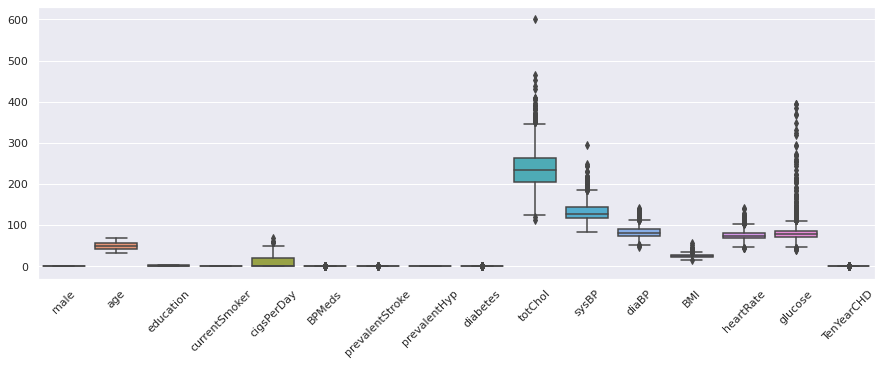

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

There is an outlier on the totChol and sysBP columns. The best Strategy will be to drop the outlier for better prediction

In [11]:
df.drop( df[ df['totChol'] == 600 ].index, inplace=True)

In [12]:
df.drop( df[ df['sysBP'] == 295 ].index, inplace=True)

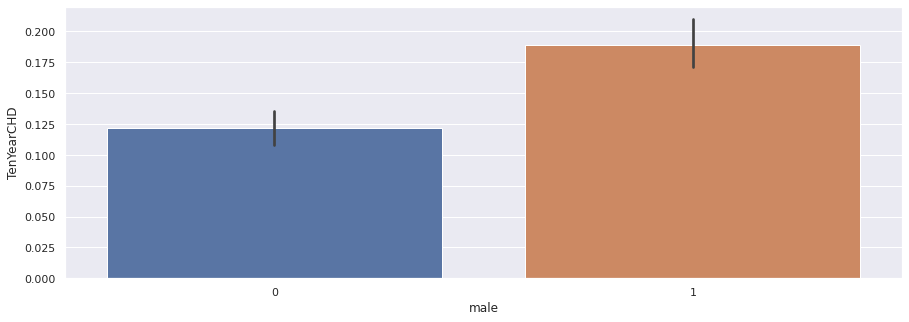

In [13]:
sns.barplot(data=df,y='TenYearCHD',x='male')

The male gender is at a higher risk of future coronary heart disease(CHD)

0    3099
1     555
Name: TenYearCHD, dtype: int64

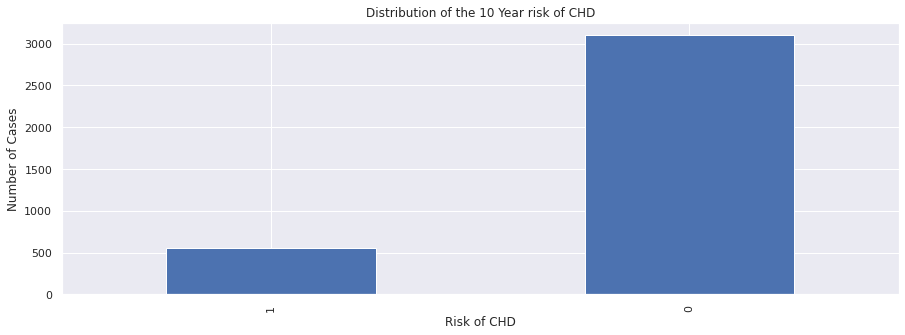

In [14]:
df['TenYearCHD'].value_counts().sort_values().plot(kind = 'bar');
plt.title('Distribution of the 10 Year risk of CHD');
plt.ylabel('Number of Cases', fontsize=12);
plt.xlabel('Risk of CHD', fontsize=12);
df['TenYearCHD'].value_counts()

From the graph: There is an imbalance in the target column.
This may create bias during prediction of our models. I will use SMOTE to balance the taget column

In [15]:
std_corr = df.corr()
print(std_corr['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.232985
sysBP              0.219350
prevalentHyp       0.180020
diaBP              0.147560
glucose            0.120978
male               0.093060
diabetes           0.090217
BPMeds             0.089481
totChol            0.086513
BMI                0.079704
cigsPerDay         0.053226
prevalentStroke    0.048523
currentSmoker      0.020476
heartRate          0.019559
education         -0.062565
Name: TenYearCHD, dtype: float64


- The education column has the least correlation with the target variable and will be dropped.

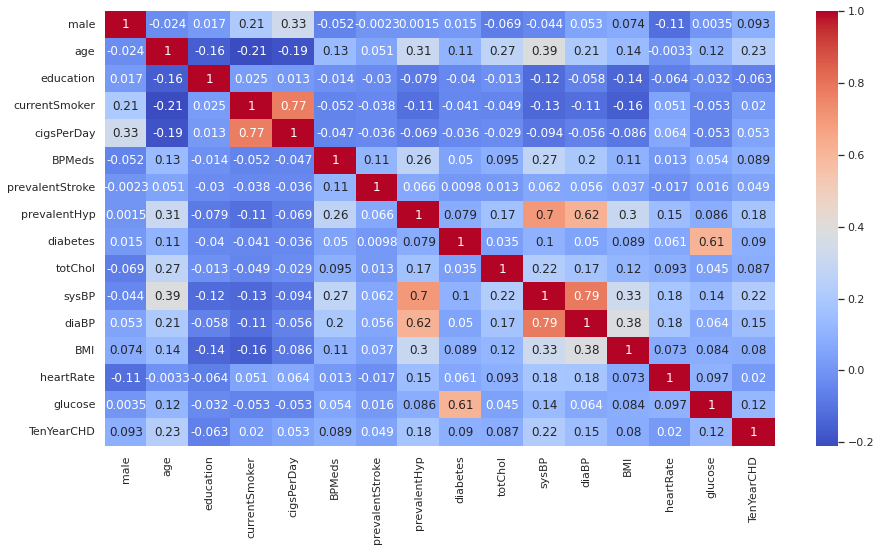

In [16]:
df= df.drop(columns=['education'])
plt.figure(figsize=[15,8])
sns.heatmap(std_corr,annot = True, cmap = 'coolwarm');

Based on the heatmap, there is a correlation between the cigs per Day and current Smoker
- Relationship between glucose and diabetes; 
- Relationship between sysBP and dialBP


#Splitting the test data and train data

In [17]:
X=df.drop(columns='TenYearCHD')
y=df['TenYearCHD']

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, stratify=y)

Instantiating the Standard Scaler-for scaling the data

In [18]:
scaler=StandardScaler()

In [19]:
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

#Logistic Regression

In [20]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(scaler, logreg)

In [21]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
preds = logreg_pipe.predict(X_test[:5])
preds

array([0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.57      0.06      0.10       139

    accuracy                           0.85       914
   macro avg       0.71      0.52      0.51       914
weighted avg       0.81      0.85      0.79       914



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


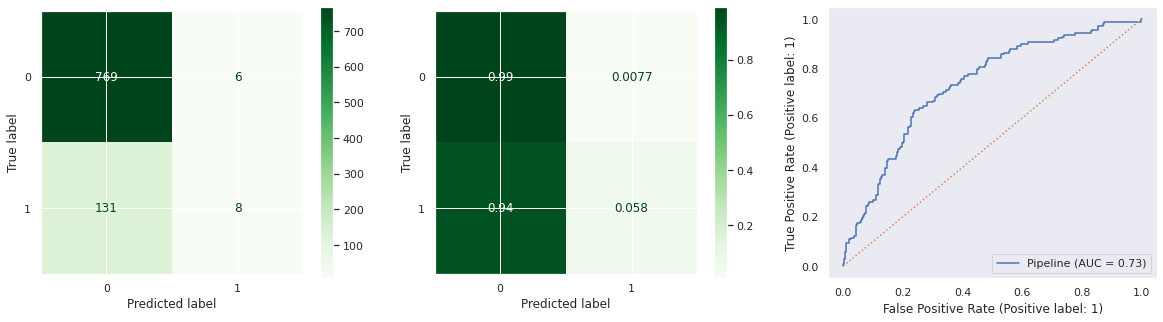

In [23]:
evaluate_classification(logreg_pipe, X_test, y_test)

- Based on the logistic regression model: The prediction has an accuracy of 86%.
- It seems to predict the '0' class better with the true negative being high but is poor at predicting the true positive.

#Tuning the Hyperparameters of the Logistic Regression Model

In [24]:
logreg2 = LogisticRegression()

logreg_pipe2 = make_pipeline(scaler, logreg2)

In [25]:
logreg2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
params = {'logisticregression__max_iter':[1000],
          'logisticregression__penalty':['l2'],
          'logisticregression__solver':['lbfgs', 'liblinear']}
logreg_grid = GridSearchCV(logreg_pipe2, params)
logreg_grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear']})

In [27]:
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear']})

In [28]:
logreg_grid.best_params_

{'logisticregression__max_iter': 1000,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [29]:
best_logreg = logreg_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.57      0.06      0.10       139

    accuracy                           0.85       914
   macro avg       0.71      0.52      0.51       914
weighted avg       0.81      0.85      0.79       914



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


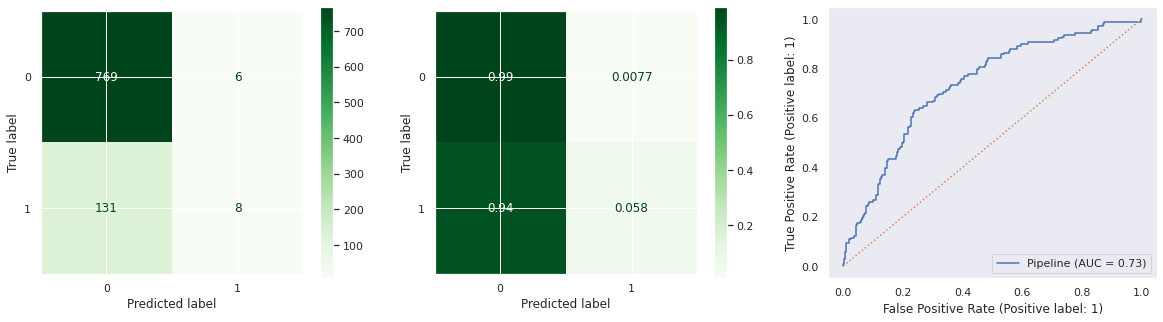

In [30]:
evaluate_classification(best_logreg, X_test, y_test)

#Logistic Regression Model with SMOTE

In [31]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [32]:
pd.Series(y_train).value_counts()

0    2324
1     416
Name: TenYearCHD, dtype: int64

In [33]:
smote = SMOTE(sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

0    2324
1    2324
Name: TenYearCHD, dtype: int64

In [34]:
smote_logreg = LogisticRegression(random_state=42)
smote_pipe = make_pipeline(scaler, smote_logreg)
smote_pipe.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       775
           1       0.25      0.59      0.35       139

    accuracy                           0.66       914
   macro avg       0.57      0.63      0.56       914
weighted avg       0.80      0.66      0.71       914



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


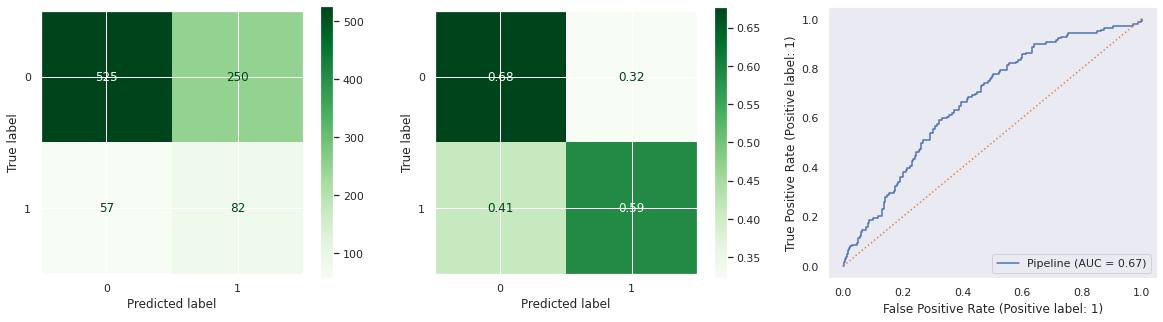

In [35]:
evaluate_classification(smote_pipe, X_test, y_test)

#Gradient Boosting Classifier

In [36]:
gbc = GradientBoostingClassifier()
gbc_pipe=make_pipeline(scaler,gbc)
gbc_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       775
           1       0.54      0.11      0.18       139

    accuracy                           0.85       914
   macro avg       0.70      0.55      0.55       914
weighted avg       0.81      0.85      0.81       914



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


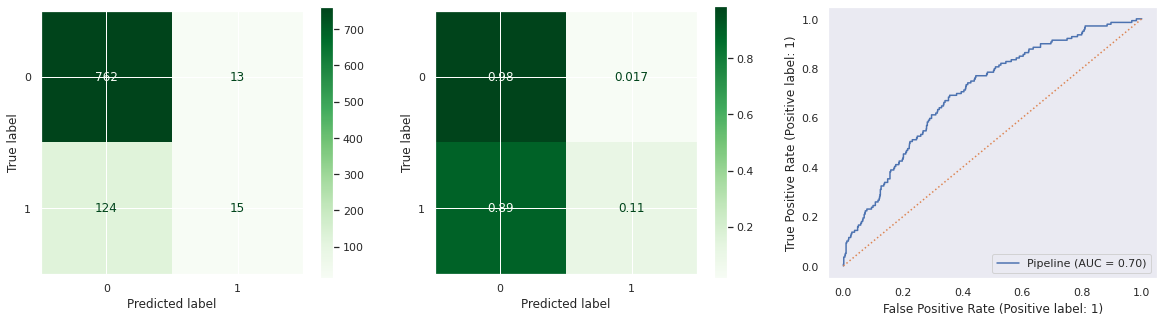

In [37]:
evaluate_classification(gbc_pipe, X_test, y_test)

- Based on the Gradient Boosting Classifier model: The prediction has an accuracy of 85%.
- It seems to predict the '0' class better with the true negative being high but is still poor at predicting the true positive.

#Tuning the Hyperparameters of the Gradient Boosting Model

In [38]:
gbc2 = GradientBoostingClassifier()
gbc_pipe2 = make_pipeline(scaler, gbc2)

In [39]:
gbc_pipe2.get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(),
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__min_weight_fraction_leaf': 0.0,
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__n_iter_no_change': None,
 'gradientboostingclassifier__random_state': None,
 'gradientboostingclassifier__subsample': 1.0,
 'gradientboostingclassifier__tol': 0.0001,
 'gradientboostingclassifier__validation_fraction': 0.1,
 'gradientbo

In [40]:
params2 = {'gradientboostingclassifier__max_depth': [5,10],
           'gradientboostingclassifier__random_state': [42],
           'gradientboostingclassifier__n_estimators': [100,500]}
gbc_grid = GridSearchCV(gbc_pipe2, params2)
gbc_grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__max_depth': [5, 10],
                         'gradientboostingclassifier__n_estimators': [100, 500],
                         'gradientboostingclassifier__random_state': [42]})

In [ ]:
gbc_grid.fit(X_train, y_train)

In [ ]:
gbc_grid.best_params_

In [ ]:
best_gbc= gbc_grid.best_estimator_

In [ ]:
evaluate_classification(best_gbc, X_test, y_test)

In [ ]:
smote_gbc =GradientBoostingClassifier(random_state=42)
smote_pipe_gbc = make_pipeline(scaler, smote_gbc)
smote_pipe_gbc.fit(X_train_smote, y_train_smote)


In [ ]:
evaluate_classification(smote_pipe_gbc, X_test, y_test)

Although the true positive value has increased there is still higher values of the false positives and false negatives

#KNN Model

In [ ]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)


In [ ]:
evaluate_classification(knn_pipe, X_test, y_test)

In [ ]:
knn2 = KNeighborsClassifier()
knn_pipe2 = make_pipeline(scaler, knn2)

In [ ]:
knn_pipe2.get_params()

In [ ]:
kn_params = { 'kneighborsclassifier__n_neighbors': [10,15,20],
              'kneighborsclassifier__p': [5,10],
              'kneighborsclassifier__weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn_pipe2, kn_params)
knn_grid

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
best_knn= knn_grid.best_estimator_

In [ ]:
evaluate_classification(best_knn, X_test, y_test)

Since there is an imbalance in the original data, the model is poor at predicting the positive class. The next step is to use the model with SMOTE technique and compare results

In [ ]:
smote_knn = KNeighborsClassifier()
smote_pipe_knn = make_pipeline(scaler, smote_knn)
smote_pipe_knn.fit(X_train_smote, y_train_smote)

In [ ]:
evaluate_classification(smote_pipe_knn, X_test, y_test)

There is a better prediction of the true positive, However the accuracy is really low at 0.62 compared to the original KNN that had an accuracy of 0.84

#Conclusion

Overall three models were applied for prediction of the future risk of coronary disease: 
- Logistic Regression
- Gradient Boosting
- KNN

Then combined the model with the SMOTE technique to balance the target data.Subsequently tuned the hyperparameters of respective models.

- Various classification metrics were used to measure prediction: Accuracy, precision, F-1 score and recall. A confusion matrix and ROC-AUC curve were plotted to visualize the positive and negative rates.

- FINAL MODEL: GBC+SMOTE Model
This is the best model overall since this dataset involves predicting crucial topic as health. A good model should be able to predict to some extent high levels of true negative and true positive - in addition to minimizing the false negative / positive which could have a negative/critical impact on people's health.

- The GBC + SMOTE Model had higher values for the true negative and true positive and an accuracy of 0.76 compared to the KNN + SMOTE model that had high true positive and negatives but a lower accuracy of 0.62